In [158]:
#Import LendClub csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [159]:
df=pd.read_csv('/Users/jisu/Desktop/Deep-Learning/LendingClub/lending_club_2020_train.csv', low_memory= False, index_col='id')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,,
124989905,6000.0,6000.0,6000.0,36 months,7.97%,187.94,A,A5,Teacher,2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
139665484,35000.0,35000.0,35000.0,60 months,14.47%,822.95,C,C2,Product Specialist,2 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
84253847,23200.0,23200.0,23200.0,60 months,24.99%,680.82,E,E4,Production Foreman,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
126296074,4500.0,4500.0,4500.0,36 months,9.93%,145.06,B,B2,Office Manager,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
148913312,15000.0,15000.0,15000.0,36 months,16.40%,530.33,C,C4,Secretary,10+ years,...,May-2020,Jul-2020,May-2020,2.0,0.0,ACTIVE,413.83,11025.25,54.62,N


In [160]:
df.shape

(1755295, 140)

In [161]:
df['issue_d_copy'] = df['issue_d'].copy()
# Convert 'issue_d' to datetime objects
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Filter by specified date range
df = df[(df['issue_d'] >= '2013-01-01') & (df['issue_d'] <= '2014-12-31')]

In [162]:
df.shape

(222028, 141)

In [163]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,issue_d_copy
id,,,,,,,,,,,,,,,,,,,,,
26220253,1000.0,1000.0,1000.0,36 months,18.24%,36.28,D,D5,Outreach Specialist,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Sep-2014
13177974,5000.0,5000.0,5000.0,36 months,11.99%,166.05,B,B3,Driver,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Apr-2014
27661825,22975.0,22975.0,22975.0,60 months,10.15%,489.85,B,B2,benefit service manager,7 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Oct-2014
7296983,14825.0,14825.0,14825.0,60 months,18.55%,380.91,D,D2,adams 12 five star schools,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Sep-2013
3724937,10000.0,10000.0,10000.0,36 months,7.62%,311.62,A,A3,Duke Manufacturing,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Mar-2013


<Axes: >

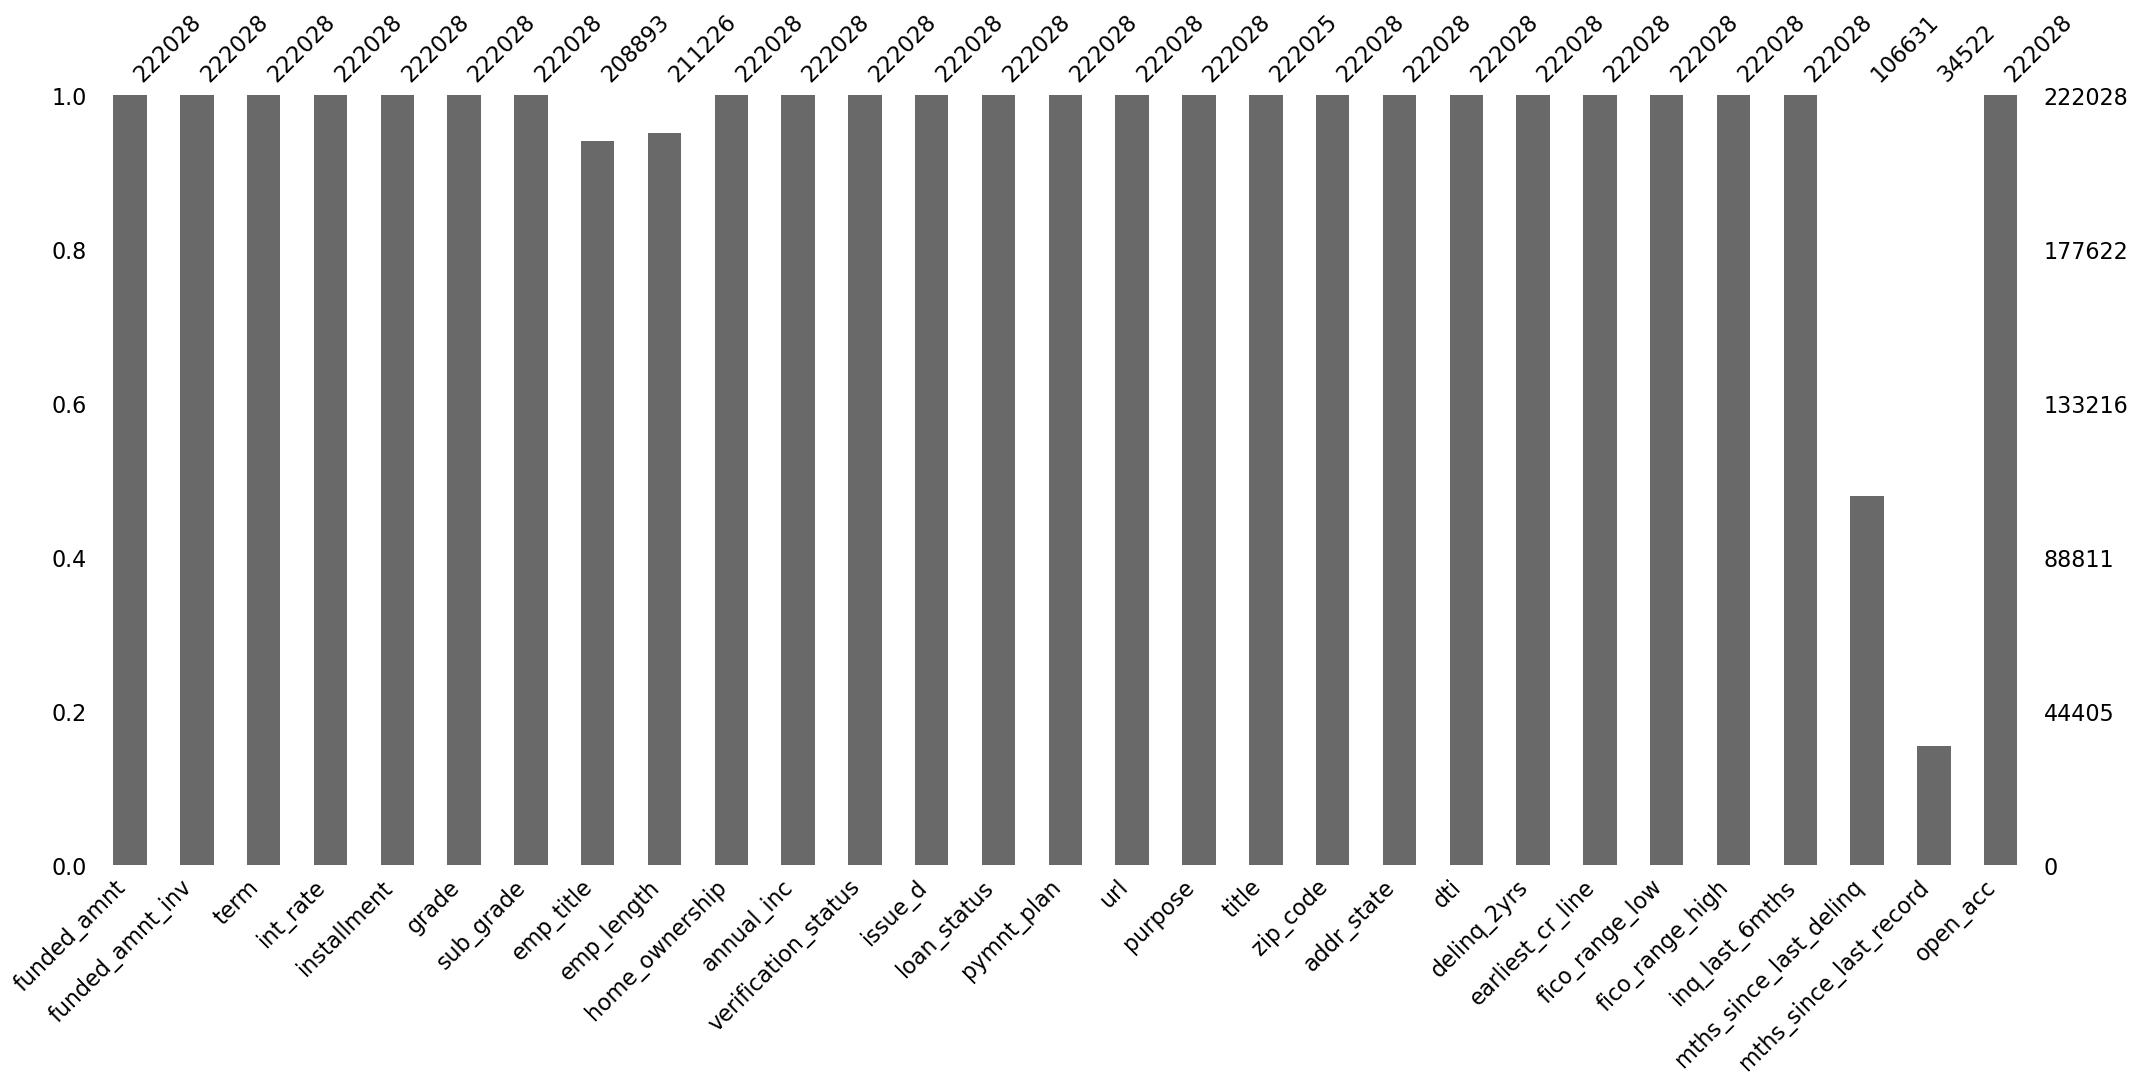

In [164]:
msno.bar(df=df.iloc[:,1:30])

<Axes: >

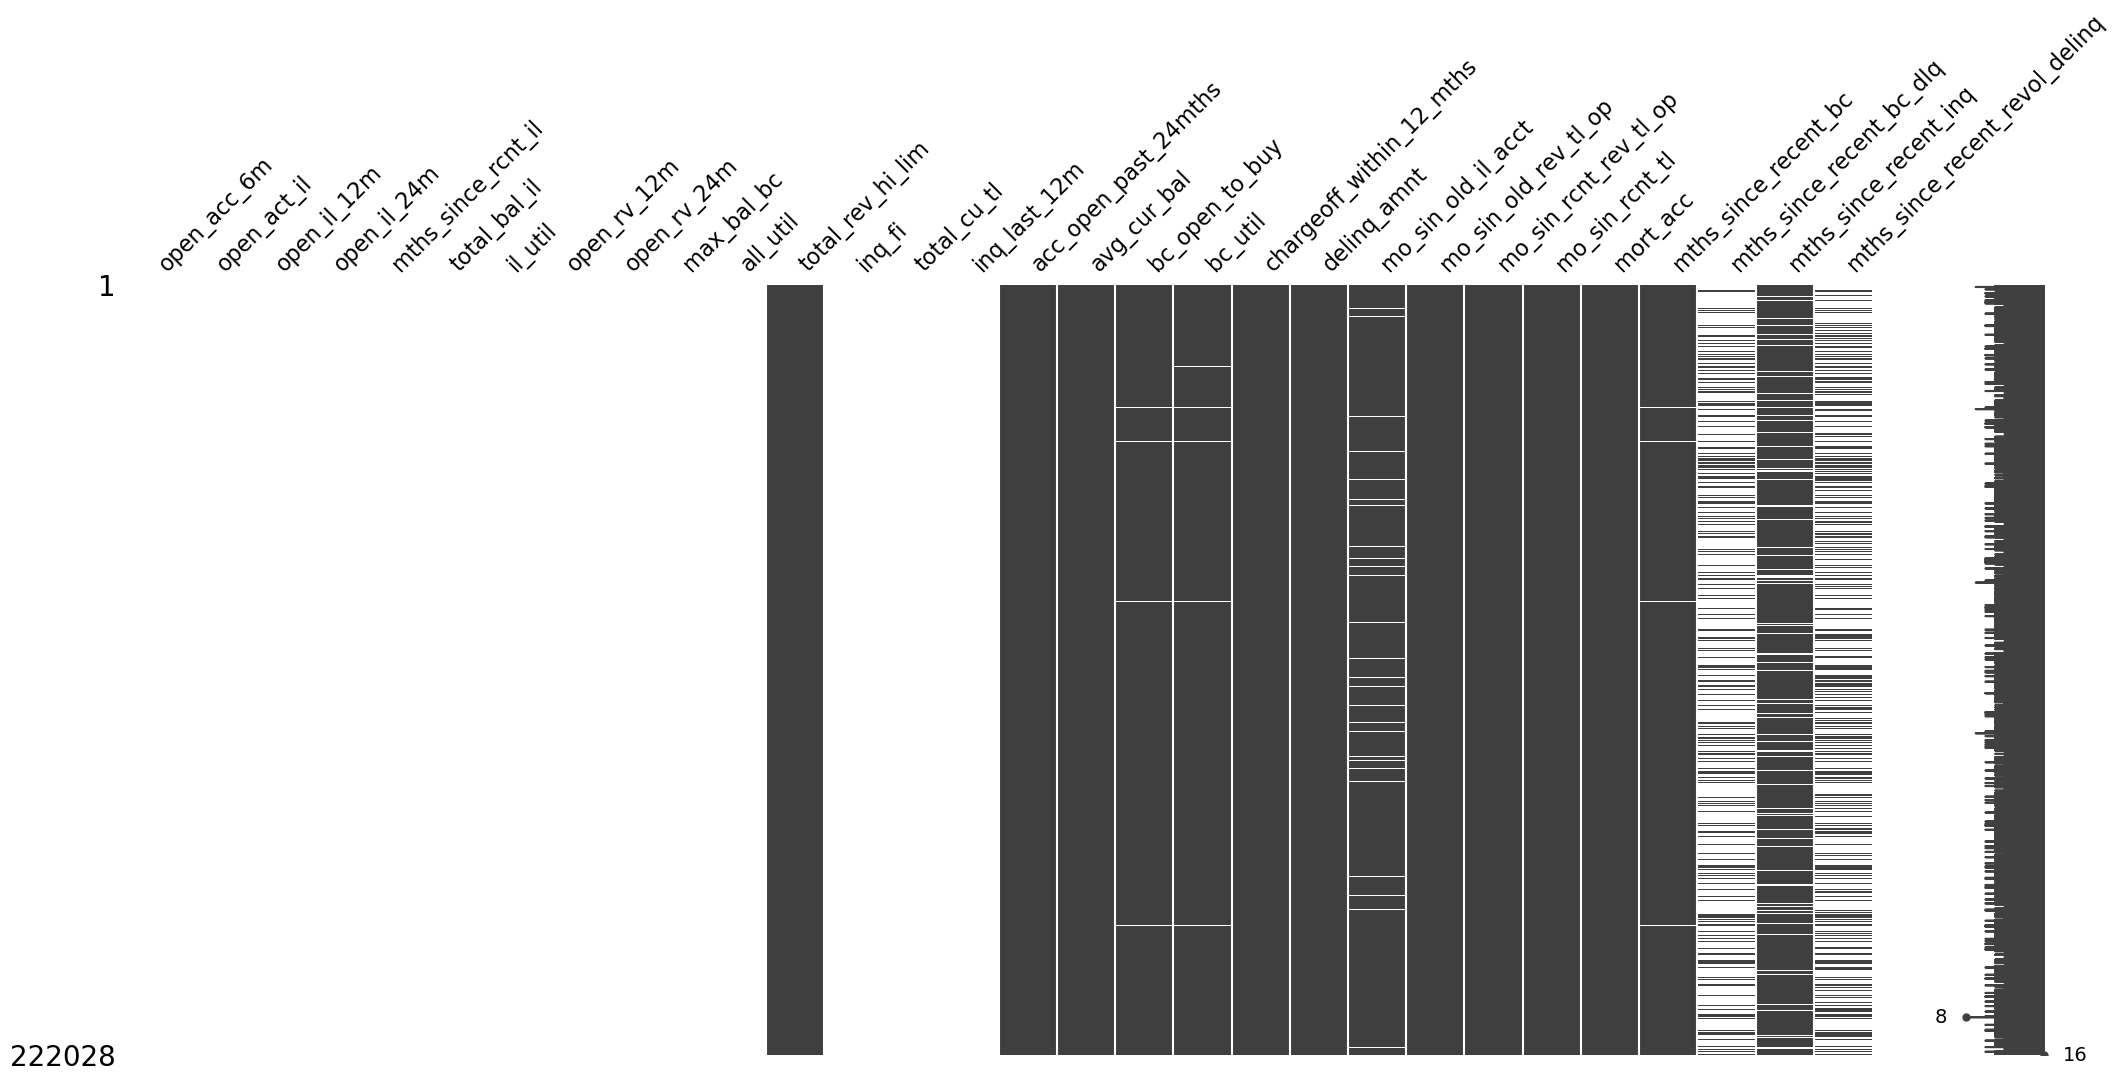

In [165]:
msno.matrix(df=df.iloc[:,60:90])

In [166]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'
        elif df[col].dtype == object:
            summary.loc[col, '데이터 종류'] = '명목형'

    return summary

In [167]:
summary = resumetable(df)
summary

데이터 세트 형상: (222028, 141)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
loan_amnt,float64,0,1310,연속형
funded_amnt,float64,0,1310,연속형
funded_amnt_inv,float64,0,1353,연속형
term,object,0,2,명목형
int_rate,object,0,146,명목형
...,...,...,...,...
orig_projected_additional_accrued_interest,float64,0,244,연속형
hardship_payoff_balance_amount,float64,0,315,연속형
hardship_last_payment_amount,float64,0,335,연속형
debt_settlement_flag,object,0,2,명목형


In [168]:
summary[summary["데이터 종류"]=="명목형"]

,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
term,object,0,2,명목형
int_rate,object,0,146,명목형
grade,object,0,7,명목형
sub_grade,object,0,35,명목형
emp_title,object,0,97521,명목형
emp_length,object,0,11,명목형
home_ownership,object,0,4,명목형
verification_status,object,0,3,명목형
loan_status,object,0,6,명목형
pymnt_plan,object,0,1,명목형


In [169]:
# Map 'loan_status' values to 0 and 1
df['loan_status_encoded'] = df['loan_status'].apply(lambda x: 0 if x in ['Fully Paid'] else 1)

In [170]:
# Get rid of post-loan variables

columns_to_drop = [
    # 'collection_recovery_fee', -> 목적함수 계산 위해 제외
    'collections_12_mths_ex_med',
    'deferral_term',
    # 'funded_amnt', -> 목적함수 계산 위해 제외
    'funded_amnt_inv',
    'hardship_amount',
    'hardship_dpd',
    'hardship_end_date',
    'hardship_flag',
    'hardship_last_payment_amount',
    'hardship_length',
    'hardship_loan_status',
    'hardship_payoff_balance_amount',
    'hardship_reason',
    'hardship_start_date',
    'hardship_status',
    'hardship_type',
    'last_fico_range_high',
    'last_fico_range_low',
    'last_pymnt_amnt',
    # 'last_pymnt_d', -> 2차 모델링을 위해 제외
    'mths_since_last_major_derog',
    'next_pymnt_d',
    'orig_projected_additional_accrued_interest',
    'out_prncp',
    'out_prncp_inv',
    'payment_plan_start_date',
    # 'total_pymnt', -> 목적함수 계산 위해 제외
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    # 'recoveries', -> 목적함수 계산 위해 제외

    ]  # Add other column names to this list

df = df.drop(columns=columns_to_drop)

In [171]:
#Get rid of features with 99% null values

threshold = 0.99

# Calculate the proportion of null values for each column
null_proportions = df.isnull().mean()

# Get the names of columns to drop
columns_to_drop = null_proportions[null_proportions >= threshold].index.tolist()

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [172]:
#Get rid of features with the same values

threshold = 0.99

# Calculate the proportion of the most frequent value for each column
dominant_proportions = df.apply(lambda x: x.value_counts(normalize=True).iloc[0] if not x.value_counts().empty else 0)

# Get the names of columns to drop
columns_to_drop = dominant_proportions[dominant_proportions >= threshold].index.tolist()

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [173]:
remaining_columns = df.columns.tolist()
remaining_columns.sort()  # Sort the list alphabetically
num_columns = len(remaining_columns)

print("Remaining columns (alphabetical order):", remaining_columns)
print("Number of remaining columns:", num_columns)

Remaining columns (alphabetical order): ['acc_open_past_24mths', 'addr_state', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'collection_recovery_fee', 'debt_settlement_flag', 'delinq_2yrs', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'grade', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'issue_d_copy', 'last_credit_pull_d', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'loan_status_encoded', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 

In [174]:
#Emp_length convert to float

def map_emp_length(value):
  if pd.isna(value):
    return value
  elif value == '< 1 year':
    return 0
  elif value == '10+ years':
    return 10
  else:
    return int(value.split()[0])  # Extract numeric value from strings like '2 years'

df['emp_length'] = df['emp_length'].apply(map_emp_length)

In [175]:
#earliest_cr_line convert to float

from datetime import datetime

# Convert 'earliest_cr_line' to datetime objects
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Calculate years from September 2018
reference_date = datetime(2018, 9, 1)
df['earliest_cr_line'] = (reference_date - df['earliest_cr_line']).dt.days / 365.25

In [176]:
# Remove '%' sign and convert to numeric
df['revol_util'] = pd.to_numeric(df['revol_util'].str.rstrip('%'), errors='coerce')

# Divide by 100 to convert percentages to decimals
df['revol_util'] = df['revol_util'] / 100

In [177]:
# Remove '%' sign and convert to numeric
df['int_rate'] = pd.to_numeric(df['int_rate'].str.rstrip('%'), errors='coerce')

# Divide by 100 to convert percentages to decimals
df['int_rate'] = df['int_rate'] / 100

In [178]:
#Fill null values with 0 for 'emp_length'

df['emp_length'] = df['emp_length'].fillna(0)

In [179]:
# One hot encoding for map_home_ownership
def map_home_ownership(value):
  if value in ['MORTGAGE', 'OWN']:
    return 0
  else:
    return 1

df['home_ownership'] = df['home_ownership'].apply(map_home_ownership)

In [180]:
# 'term' 열에서 숫자만 추출하고, 이를 정수형으로 변환한 후 30을 곱하여 새로운 열에 저장
df['term_days'] = df['term'].str.extract('(\d+)').astype(int) * 30

In [181]:
# One hot encoding for map_term
def map_term(value):
  if value == ' 36 months':
    return 0
  else:
    return 1

df['term'] = df['term'].apply(map_term)

In [182]:
#One hot encoding for map_verification_status
def map_verification_status(value):
  if value in ['Verified', 'Source Verified']:
    return 0
  else:
    return 1

df['verification_status'] = df['verification_status'].apply(map_verification_status)

In [183]:
#Fill null values with -1
columns_to_fill = [
    'mths_since_last_delinq',
    'mths_since_last_record',
    'mths_since_recent_bc',
    'mths_since_recent_bc_dlq',
    'mths_since_recent_inq',
    'mths_since_recent_revol_delinq',
    'delinq_2yrs'

    ]  # Add other column names to this list

df[columns_to_fill] = df[columns_to_fill].fillna(-1)

In [184]:
# How many null values for float columns
float_columns = df.select_dtypes(include=['float']).columns
null_percentages = df[float_columns].isnull().mean() * 100
print(null_percentages)

loan_amnt                         0.000000
funded_amnt                       0.000000
int_rate                          0.000000
installment                       0.000000
emp_length                        0.000000
annual_inc                        0.000000
dti                               0.000000
delinq_2yrs                       0.000000
earliest_cr_line                  0.000000
fico_range_low                    0.000000
fico_range_high                   0.000000
inq_last_6mths                    0.000000
mths_since_last_delinq            0.000000
mths_since_last_record            0.000000
open_acc                          0.000000
pub_rec                           0.000000
revol_bal                         0.000000
revol_util                        0.059002
total_acc                         0.000000
total_pymnt                       0.000000
recoveries                        0.000000
collection_recovery_fee           0.000000
tot_coll_amt                      0.000000
tot_cur_bal

In [185]:
#Fill null values with mean #1
columns_to_fill = [
    'mo_sin_old_il_acct',
    'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl'
    ]

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

In [186]:
#Fill null values with 0
columns_to_fill = ['pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies']

df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [187]:
#Fill null values with mean for the rest of the float columns
float_columns = df.select_dtypes(include=['float']).columns

for column in float_columns:
    df[column] = df[column].fillna(df[column].mean())

In [188]:
# Object Columns to drop (not useful)

columns_to_drop = ['last_credit_pull_d'] # 'issue_d' -> 2차 모델링을 위해 제외

df = df.drop(columns=columns_to_drop)

In [189]:
# Object Columns to drop (useful but don't know how)
columns_to_drop = ['debt_settlement_flag', 'emp_title', 'title', 'url']

df = df.drop(columns=columns_to_drop)

In [190]:
# Random Sampling to match defaults : not-default to 1:1
# Separate the DataFrame into two parts based on 'loan_status_encoded'
len(df[df['loan_status_encoded'] == 0]), len(df[df['loan_status_encoded'] == 1])

(184483, 37545)

In [191]:
loan_status_counts = df['loan_status_encoded'].value_counts()
print("Counts:\n", loan_status_counts)

proportion = loan_status_counts[0] / loan_status_counts[1]
print("\nProportion of 0 to 1:", proportion)

Counts:
 loan_status_encoded
0    184483
1     37545
Name: count, dtype: int64

Proportion of 0 to 1: 4.913650286323079


In [192]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl

In [193]:
# 빈 데이터프레임 생성
combined_df = pd.DataFrame()

# 연도 범위 설정
start_year = 2013
end_year = 2014

# 각 연도의 데이터 불러와서 합치기
for year in range(start_year, end_year + 1):
    url = f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{year}/all?type=daily_treasury_yield_curve&field_tdr_date_value={year}&page&_format=csv'
    try:
        # 데이터 불러오기
        yearly_df = pd.read_csv(url)
        
        # 데이터프레임에 연도 정보 추가
        yearly_df['Year'] = year
        
        # 데이터프레임 합치기
        combined_df = pd.concat([combined_df, yearly_df], ignore_index=True)
        print(f"Data for {year} added successfully.")
    except Exception as e:
        print(f"Failed to fetch data for {year}: {e}")

# 결과 확인
print(combined_df.head())
print(combined_df.tail())

Data for 2013 added successfully.
Data for 2014 added successfully.
         Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
0  12/31/2013  0.01  0.07  0.10  0.13  0.38  0.78  1.75  2.45   3.04   3.72   
1  12/30/2013  0.01  0.07  0.10  0.13  0.39  0.77  1.71  2.40   2.99   3.66   
2  12/27/2013  0.01  0.07  0.09  0.12  0.40  0.79  1.74  2.44   3.02   3.70   
3  12/26/2013  0.00  0.07  0.09  0.13  0.42  0.81  1.74  2.43   3.00   3.68   
4  12/24/2013  0.01  0.07  0.09  0.14  0.38  0.80  1.73  2.43   2.99   3.66   

   30 Yr  Year  
0   3.96  2013  
1   3.90  2013  
2   3.94  2013  
3   3.92  2013  
4   3.90  2013  
           Date  1 Mo  3 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  20 Yr  \
495  01/08/2014  0.00  0.05  0.08  0.13  0.43  0.87  1.77  2.44   3.01   3.67   
496  01/07/2014  0.01  0.04  0.08  0.13  0.40  0.80  1.69  2.37   2.96   3.64   
497  01/06/2014  0.01  0.05  0.08  0.12  0.40  0.78  1.70  2.38   2.98   3.66   
498  01/03/2014  0.02  0.07  0.

In [194]:
df['issue_d_copy']
df['year'] = df['issue_d_copy'].astype(str).apply(lambda x: x.split('-')[1] if '-' in x else None)
df = df.drop('issue_d_copy', axis=1)

In [195]:
Y3_2013, Y5_2013 = combined_df[(combined_df['Year']==2013)][['1 Yr', '5 Yr']].mean()/100
Y3_2014, Y5_2014 = combined_df[(combined_df['Year']==2014)][['1 Yr', '5 Yr']].mean()/100

In [196]:
df

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_encoded,term_days,year
id,,,,,,,,,,,,,,,,,,,,,
26220253,1000.0,1000.0,0,0.1824,36.28,D,D5,10.0,1,70000.0,...,100.0,0.0,1.0,82804.0,61559.0,22800.0,51304.0,0,1080,2014
13177974,5000.0,5000.0,0,0.1199,166.05,B,B3,10.0,0,37000.0,...,80.0,0.0,0.0,55620.0,18537.0,8000.0,12955.0,0,1080,2014
27661825,22975.0,22975.0,1,0.1015,489.85,B,B2,7.0,0,81000.0,...,75.0,0.0,0.0,203958.0,72241.0,21200.0,79120.0,0,1800,2014
7296983,14825.0,14825.0,1,0.1855,380.91,D,D2,10.0,1,37000.0,...,40.0,0.0,0.0,63937.0,26644.0,15300.0,34437.0,1,1800,2013
3724937,10000.0,10000.0,0,0.0762,311.62,A,A3,10.0,0,85000.0,...,25.0,0.0,0.0,350965.0,107907.0,47797.0,100380.0,1,1080,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30135013,10000.0,10000.0,1,0.1629,244.73,D,D2,2.0,0,35000.0,...,75.0,0.0,0.0,62299.0,33653.0,8300.0,49999.0,1,1800,2014
8125569,9000.0,9000.0,0,0.1299,303.21,B,B4,7.0,1,110000.0,...,33.3,0.0,0.0,96329.0,70023.0,27500.0,51629.0,0,1080,2013
3218223,26500.0,26500.0,1,0.1727,662.45,C,C5,2.0,0,60000.0,...,100.0,0.0,0.0,258273.0,34014.0,18900.0,16784.0,0,1800,2013


In [197]:
# 먼저 tbond_int 열을 생성하고 기본값을 설정합니다.
df['tbond_int'] = 0

# year 값, term값에 따라 tbond_int 값을 설정합니다.
df.loc[(df['year'] == '2013') & (df['term'] == 0), 'tbond_int'] = Y3_2013 # 2013, 36mo
df.loc[(df['year'] == '2014') & (df['term'] == 0), 'tbond_int'] = Y3_2014 # 2014, 60mo
df.loc[(df['year'] == '2013') & (df['term'] == 1), 'tbond_int'] = Y5_2013 # 2013, 36mo
df.loc[(df['year'] == '2014') & (df['term'] == 1), 'tbond_int'] = Y5_2014 # 2014, 60mo

/var/folders/2w/lkcqygdx72s_vktqq1wmb9p40000gn/T/ipykernel_35677/4227094254.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0013116000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['year'] == '2013') & (df['term'] == 0), 'tbond_int'] = Y3_2013 # 2013, 36mo


In [198]:
#Export
df.to_csv('LC_Data_Cleaned_0902.csv', index=False)

In [199]:
# 날짜 열을 datetime 객체로 변환
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y', errors='coerce')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%Y-%m-%d', errors='coerce')

# 두 날짜 간의 차이를 계산하여 새로운 열에 저장
df['days_since_issue'] = (df['last_pymnt_d'] - df['issue_d']).dt.days

# 결과 확인
print(df[['last_pymnt_d', 'issue_d', 'days_since_issue']])

         last_pymnt_d    issue_d  days_since_issue
id                                                
26220253   2015-06-01 2014-09-01             273.0
13177974   2017-02-01 2014-04-01            1037.0
27661825   2017-06-01 2014-10-01             974.0
7296983    2014-08-01 2013-09-01             334.0
3724937    2015-02-01 2013-03-01             702.0
...               ...        ...               ...
30135013   2016-07-01 2014-10-01             639.0
8125569    2015-01-01 2013-10-01             457.0
3218223    2016-08-01 2013-02-01            1277.0
12987407   2014-06-01 2014-03-01              92.0
5205034    2015-11-01 2013-05-01             914.0

[222028 rows x 3 columns]


In [200]:
df['term_days']

id
26220253    1080
13177974    1080
27661825    1800
7296983     1800
3724937     1080
            ... 
30135013    1800
8125569     1080
3218223     1800
12987407    1080
5205034     1080
Name: term_days, Length: 222028, dtype: int64